# Traffic Sign Recognition

This python notebook contains the source code to build a traffic sign recognition model to classify traffic signs using a deep convolutional neural network. It uses Keras with TensorFlow as backend and Scikit-Learn to degine the model architecture and PIL, Scikit-Image and OpenCV for image processing.

The dataset used to train and test the model is the German Traffic Sign Recognition Benchmark (GTSRB) available at https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

## Import relevant libraries and set path to the dataset

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import transform, exposure, io

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_data = []
Y_labels = []
total_class = 43
cur_dir = os.getcwd()
dataset_dir = os.path.join(cur_dir, "gtsrb-german-traffic-sign")

## Complete set of labels/classes in the dataset

In [2]:
# Create label dictionary 
import csv
    
labels_dict = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    labels_dict = {int(rows[0]):rows[1] for rows in reader}
print(labels_dict)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

## Image Preprocessing

Load the images using Scikit-Image and resize the image to size 32x32. Most of the images in the dataset suffer from poor lighting and low brightness/contrast. Hence the Contrast Limited Adaptive Histogram Equalization (CLAHE) was applied to improve contrast and increase brightness of images. It helps to normalize and enhance local contrast details in regions that are darker or lighter than most of the image.

In [3]:
count = 0
for index in range(total_class):
    path = os.path.join(dataset_dir, 'train', str(index))
    images = os.listdir(path)

# iterating over all images in the train folder

    for i, img in enumerate(images):
        try:
            # preprocessing the image to size 32x32 and 
            # applying Contrast Limited Adaptive Histogram Equalization (CLAHE)
            # to improve contrast and increase brightness of images
            if count > 0 and count % 1000 == 0:
                print("[INFO] processed {} total images".format(count))
            image = io.imread(path + '\\' + img)
            image = transform.resize(image, (32, 32))
            image = exposure.equalize_adapthist(image, clip_limit=0.1)

            X_data.append(image)
            Y_labels.append(index)
            count+=1

        except:
                print("Error loading image")

X_data = np.array(X_data)
Y_labels = np.array(Y_labels)

print(X_data.shape, Y_labels.shape)

[INFO] processed 1000 total images
[INFO] processed 2000 total images
[INFO] processed 3000 total images
[INFO] processed 4000 total images
[INFO] processed 5000 total images
[INFO] processed 6000 total images
[INFO] processed 7000 total images
[INFO] processed 8000 total images
[INFO] processed 9000 total images
[INFO] processed 10000 total images
[INFO] processed 11000 total images
[INFO] processed 12000 total images
[INFO] processed 13000 total images
[INFO] processed 14000 total images
[INFO] processed 15000 total images
[INFO] processed 16000 total images
[INFO] processed 17000 total images
[INFO] processed 18000 total images
[INFO] processed 19000 total images
[INFO] processed 20000 total images
[INFO] processed 21000 total images
[INFO] processed 22000 total images
[INFO] processed 23000 total images
[INFO] processed 24000 total images
[INFO] processed 25000 total images
[INFO] processed 26000 total images
[INFO] processed 27000 total images
[INFO] processed 28000 total images
[

## Training-Testing Split

In [4]:
# split the images in train folder for training and validation/testing
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_labels, test_size=0.2, random_state=42)

# TODO: How many unique classes/labels there are in the dataset.
labels_index = np.unique(y_train)
n_labels = len(labels_index)

print("Number of training samples =", len(x_train))
print("Number of testing samples =", len(x_test))
print("Number of labels/classes =", n_labels)

print("Shape of x_train: ", x_train.shape, " and y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape, " and y_test: ", y_test.shape)

Number of training samples = 31367
Number of testing samples = 7842
Number of labels/classes = 43
Shape of x_train:  (31367, 32, 32, 3)  and y_train:  (31367,)
Shape of x_test:  (7842, 32, 32, 3)  and y_test:  (7842,)


## Class/Label Distribution

The class distribution of this dataset is far from uniform and quite skewed towards some classes. The largest classes have 10x the number of traffic sign images than the smallest classes. This is expected given that in real-life there are certain signs which appear more frequently than others. However, when training the model, I wanted a more uniform distribution so that each class has the same number of training examples and the model, therefore, has an equal number of opportunities to learn each sign.

In [ ]:
# Plot class/label distribution for the dataset
y_train_df = pd.DataFrame()
y_train_df['label'] = y_train
ax = y_train_df['label'].value_counts().plot(kind='barh', figsize = (10,10), title='Number of Samples per Class')
ax.set_yticklabels(list(map(lambda x: labels_dict[x], y_train_df['label'].value_counts().index.tolist())))            
for i, v in enumerate(y_train_df['label'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v), color='black')

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [5]:
# one hot encoding the labels

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Augmentation of the image data

Transformations such as rotation, zoom, dimension shift, and shearing were applied to the images to introduce some variability and mimic real-life scenarios where the camera might not have clear head-on view of a sign. This helps the model to be trained on non-ideal images, improving reliability. No horizontal or vertical flips were applied as those are very unlikely to be encountered in rea life.

ZCA Whitening helped to highlight the edges of the images and make them more prominent, especially on images with poor lighting.
As noted above, since most images in the dataset have dark backgrounds due to being captured in poor lighting, grayscaling was avoided as it would make this problem even worse. Instead, color channel shift is used to combat the potential issue of the model being overfit on a particular shade of color, which would be red in this case.

In [6]:
NUM_EPOCHS = 15
BS = 64 # batch size
INIT_LR = 1e-3 # initial learning rate 0.001

# account for class skew in training data
class_totals = y_train.sum(axis=0)
class_weight = class_totals.max() / class_totals

# define the augmentation using ImageDataGenerator
aug = ImageDataGenerator(
    zca_whitening=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    channel_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

C:\Users\Richa\Anaconda3\envs\data_science\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


## Defining the CNN Model

In [7]:
from tensorflow.keras.optimizers import Adam


# contruct the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(total_class, activation='softmax'))

opt = Adam(lr=INIT_LR, decay=INIT_LR / (NUM_EPOCHS * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print('[INFO] Compiled the model successfully')

[INFO] Compiled the model successfully


In [8]:
print('[INFO] Model Summary')
model.summary()

[INFO] Model Summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

[INFO] Model Visualization


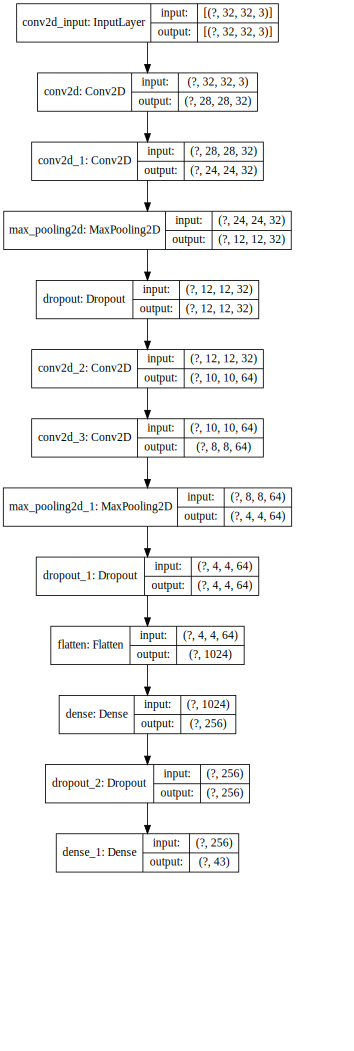

In [9]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

print('[INFO] Model Visualization')
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))

## Training and Saving the Model

In [10]:
# apply the augmentation and fit the model
print('[INFO] Training the model...')
history = model.fit(aug.flow(x_train, y_train, batch_size=BS), 
                    steps_per_epoch=x_train.shape[0] // BS, 
                    epochs=NUM_EPOCHS, 
                    validation_data=(x_test, y_test),
                    class_weight=class_weight,
                    verbose=1)

# save trained model to disk
model.save('ModelC_traffic_signnet_enhanced.h5')
print('[INFO] Saved trained model to disk')

[INFO] Training the model...
  ...
    to  
  ['...']


C:\Users\Richa\Anaconda3\envs\data_science\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Richa\Anaconda3\envs\data_science\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Train for 490 steps, validate on 7842 samples
Epoch 1/15


C:\Users\Richa\Anaconda3\envs\data_science\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Richa\Anaconda3\envs\data_science\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


490/490 [==============================] - 76s 155ms/step - loss: 2.1574 - accuracy: 0.3757 - val_loss: 0.6543 - val_accuracy: 0.7707
Epoch 2/15
490/490 [==============================] - 73s 149ms/step - loss: 0.8585 - accuracy: 0.7261 - val_loss: 0.1853 - val_accuracy: 0.9453
Epoch 3/15
490/490 [==============================] - 68s 139ms/step - loss: 0.5209 - accuracy: 0.8322 - val_loss: 0.1091 - val_accuracy: 0.9594
Epoch 4/15
490/490 [==============================] - 72s 146ms/step - loss: 0.3983 - accuracy: 0.8722 - val_loss: 0.0726 - val_accuracy: 0.9764
Epoch 5/15
490/490 [==============================] - 72s 147ms/step - loss: 0.3171 - accuracy: 0.8998 - val_loss: 0.0497 - val_accuracy: 0.9839
Epoch 6/15
490/490 [==============================] - 68s 138ms/step - loss: 0.2723 - accuracy: 0.9154 - val_loss: 0.0469 - val_accuracy: 0.9850
Epoch 7/15
490/490 [==============================] - 74s 152ms/step - loss: 0.2341 - accuracy: 0.9240 - val_loss: 0.0396 - val_accuracy: 0.9

## Plotting Accuracy vs Epoch and Loss vs Epoch Graphs for the Model

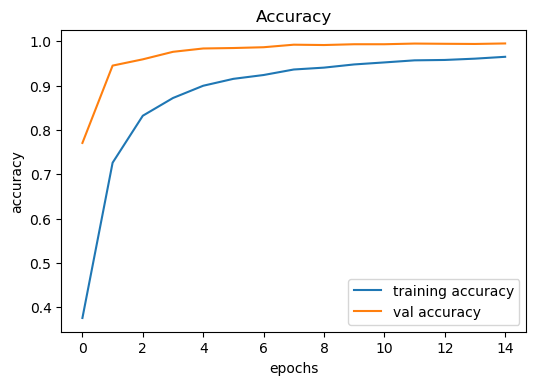

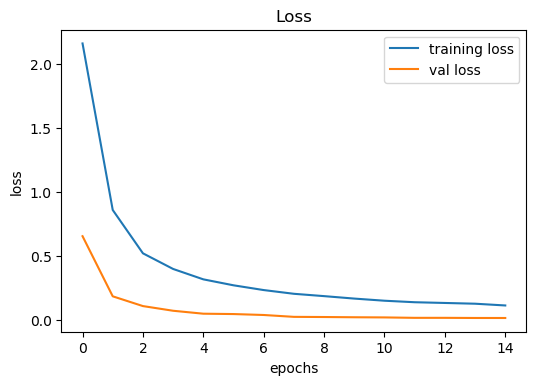

In [11]:
plt.figure(0, dpi=100)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1, dpi=100)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Calculating Accuracy Score for the Model

In [12]:
# Testing the model

from sklearn.metrics import accuracy_score

test = pd.read_csv(os.path.join(dataset_dir, 'Test.csv'))

labels = test["ClassId"].values
img_paths = test["Path"].values

test_data = []
for path in img_paths:
    image = io.imread(os.path.join(dataset_dir, path))
    image = transform.resize(image, (32, 32))
    image = exposure.equalize_adapthist(image, clip_limit=0.1)
    test_data.append(np.array(image))

test_data = np.array(test_data)
pred = model.predict_classes(test_data)

# Accuracy with test data

score = accuracy_score(labels, pred)
print(f"{score:.3%}")

97.736%


## Evaluating the Model

In [ ]:
from sklearn.metrics import classification_report

# load the label names
label_names = open("signnames.csv").read().strip().split("\n")[1:]
label_names = [l.split(",")[1] for l in label_names]

# evaluate the network
print("[INFO] Evaluating network...")
predictions = model.predict(x_test, batch_size=BS)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=label_names))